Evaluate the Buy-and-hold strategy Warren Buffett proposes
How to calculate the CAGR – the Compound Annual Growth Rate – and what it is

In [1]:
import pandas as pd
import datetime as dt
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
start = dt.datetime(1999,1,1)
sensex = pdr.get_data_yahoo("^BSESN",start)

In [3]:
sensex.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-01-04,3148.070068,3113.620117,3113.620117,3122.040039,0.0,3122.040039
1999-01-05,3150.310059,3103.620117,3129.580078,3149.060059,0.0,3149.060059
1999-01-06,3214.360107,3152.939941,3172.310059,3205.679932,0.0,3205.679932
1999-01-07,3321.469971,3239.649902,3239.850098,3299.090088,0.0,3299.090088
1999-01-08,3400.969971,3340.510010,3356.189941,3397.840088,0.0,3397.840088


In [4]:
sensex.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-03-09,54893.730469,53367.519531,53793.988281,54647.328125,14100.0,54647.328125
2022-03-10,56242.468750,54982.820312,56242.468750,55464.390625,9800.0,55464.390625
2022-03-11,55833.949219,55049.949219,55218.781250,55550.300781,9700.0,55550.300781
2022-03-14,56545.828125,55556.468750,55614.398438,56486.019531,9100.0,56486.019531
2022-03-14,56545.828125,55556.468750,55614.398438,56486.019531,0.0,56486.019531


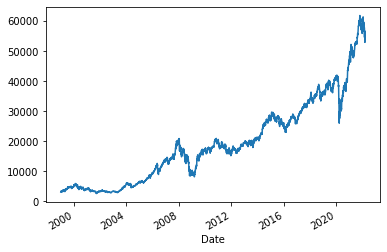

In [5]:
fig,ax = plt.subplots()
sensex['Close'].plot(ax=ax)

The lost decade

The years 1999 to 2009 are considered the “lost decade” of Sensex

In [6]:
sensex['2009'].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-01-02,10070.280273,9863.860352,9973.059570,9958.219727,51600.0,9958.219727
2009-01-05,10306.169922,10069.110352,10124.919922,10275.599609,51200.0,10275.599609
2009-01-06,10392.120117,10150.679688,10241.509766,10335.929688,55600.0,10335.929688
2009-01-07,10469.719727,9510.150391,10424.959961,9586.879883,217600.0,9586.879883
2009-01-09,9630.400391,9250.820312,9434.849609,9406.469727,158200.0,9406.469727


In [7]:
sensex['1999'].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-01-04,3148.070068,3113.620117,3113.620117,3122.040039,0.0,3122.040039
1999-01-05,3150.310059,3103.620117,3129.580078,3149.060059,0.0,3149.060059
1999-01-06,3214.360107,3152.939941,3172.310059,3205.679932,0.0,3205.679932
1999-01-07,3321.469971,3239.649902,3239.850098,3299.090088,0.0,3299.090088
1999-01-08,3400.969971,3340.510010,3356.189941,3397.840088,0.0,3397.840088


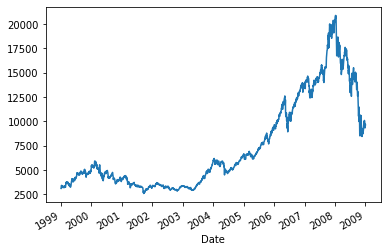

In [8]:
fig, ax = plt.subplots()
sensex['Close'].loc[:'2009-01-01'].plot()


Very less growth in the decade from 1999 to 2009

The key learning is that long run means at least more than 10 years.

Calculate the CAGR for Sensex


In [9]:
data = sensex['Close'].loc['1999':'2008']

In [10]:
total_return = data.iloc[-1]/data.iloc[0]

In [11]:
total_return

3.0900659343271704

This means that we made money. We made 1 + 3.09 = 4.09 or 4.09%

In [12]:
(data.iloc[-1]/data.iloc[0])**(1/10) - 1

0.11942956977819574

That is a gain of 11% per year

If I in 1999 invested all my money in a low-cost fund tracking the Sensex, I would gain 11% per year or 4% in total gain over the next 10 years.

Project – Calculate the CAGR and Maximum Drawdown of sensex from 2011 to current date.

In [13]:
data = sensex['Close'].loc['2011':]

In [15]:
data.head()

Date
2011-01-03    20561.050781
2011-01-04    20498.720703
2011-01-05    20301.099609
2011-01-06    20184.740234
2011-01-07    19691.810547
Name: Close, dtype: float64

In [14]:
data.tail()

Date
2022-03-09    54647.328125
2022-03-10    55464.390625
2022-03-11    55550.300781
2022-03-14    56486.019531
2022-03-14    56486.019531
Name: Close, dtype: float64

We calculate the CAGR for the period of 11 years.

In [16]:
(data.iloc[-1]/data.iloc[0])**(1/11)-1

0.09622475729502633

That looks better. A 9% annual return for the period of 11 years.

“A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.” – Investopedia.org

We calculate the maximum drawdown.

In [17]:
rolling_max = data.cummax()
daily_drawdown = data/rolling_max - 1
max_drawdown = daily_drawdown.cummin().iloc[-1]
max_drawdown

-0.3807005445967564

That is a maximum drawdown on 38.07% for the period of 11 years.